In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import plotly.graph_objects as go
import sys
sys.path.append("/public/src")

from factor_evaluation_server import DataService, FactorEvaluation 

### Data warehouse

In [2]:
ds = DataService()

#### 15min

In [3]:
df_BTC_15m = ds["BTCUSDT_15m_2020_2025"]["2021-10-01":]

In [4]:
df_BTC_15m["vwap"] = df_BTC_15m["turnover"] / df_BTC_15m["volume"]
df_BTC_15m["vwap_buyer"] = df_BTC_15m["taker_buy_turnover"] / df_BTC_15m["taker_buy_volume"]
df_BTC_15m

,open,high,low,close,volume,close_time,turnover,trade_count,taker_buy_volume,taker_buy_turnover,vwap,vwap_buyer
open_time,,,,,,,,,,,,
2021-10-01 00:00:00,43799.4900,43968.0000,43694.4200,43732.8400,5790.5770,1633047299999,253819665.9943,48953,2704.2370,118589693.1946,43833.2253,43853.2914
2021-10-01 00:15:00,43732.8400,43872.4700,43662.0100,43845.9000,2413.8930,1633048199999,105656991.6827,22457,1400.4590,61298017.7439,43770.3708,43769.9481
2021-10-01 00:30:00,43845.9500,44043.2200,43811.4000,43864.4400,5499.2290,1633049099999,241532219.2020,37929,2996.0950,131648640.7313,43921.1059,43940.0756
2021-10-01 00:45:00,43863.9700,43874.5800,43637.4300,43672.2600,3688.5100,1633049999999,161290808.2233,28019,1647.9220,72065281.4298,43727.9032,43731.0027
2021-10-01 01:00:00,43671.5000,43672.8200,43401.9900,43477.3400,4282.6940,1633050899999,186342551.4200,43148,1881.4010,81862121.6453,43510.5920,43511.2566
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-09 04:45:00,108442.8000,108522.0000,108414.4000,108500.0000,484.3030,1752037199999,52534762.1801,8550,294.6570,31963601.3019,108474.9881,108477.3187
2025-07-09 05:00:00,108500.0000,108581.8000,108472.4000,108506.2000,643.4460,1752038099999,69831928.0365,12673,379.4050,41176852.6099,108528.0319,108530.0737
2025-07-09 05:15:00,108506.2000,108537.0000,108428.7000,108450.0000,349.1080,1752038999999,37875220.8078,6713,149.4450,16213780.5372,108491.4147,108493.2954


### Factor 2: Momentum Factor

In [6]:
def momentum(df = df_BTC_15m, short = 1, long = 6):
    
    short_ago = df["close"].shift(short)
    long_ago = df["close"].shift(long)
    factor =  (short_ago / long_ago - 1)

    return factor

### Evaluation

In [7]:
evaluator = FactorEvaluation(df = df_BTC_15m, 
                             future_return_periods = 10, 
                             factor_func = momentum, 
                             factor_name = "momentum"
                             )


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): -0.008726
   Rank_IC (Spearman): -0.038010
📊 信息比率:
   IR: -0.417237
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 132197
   因子列: momentum
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------


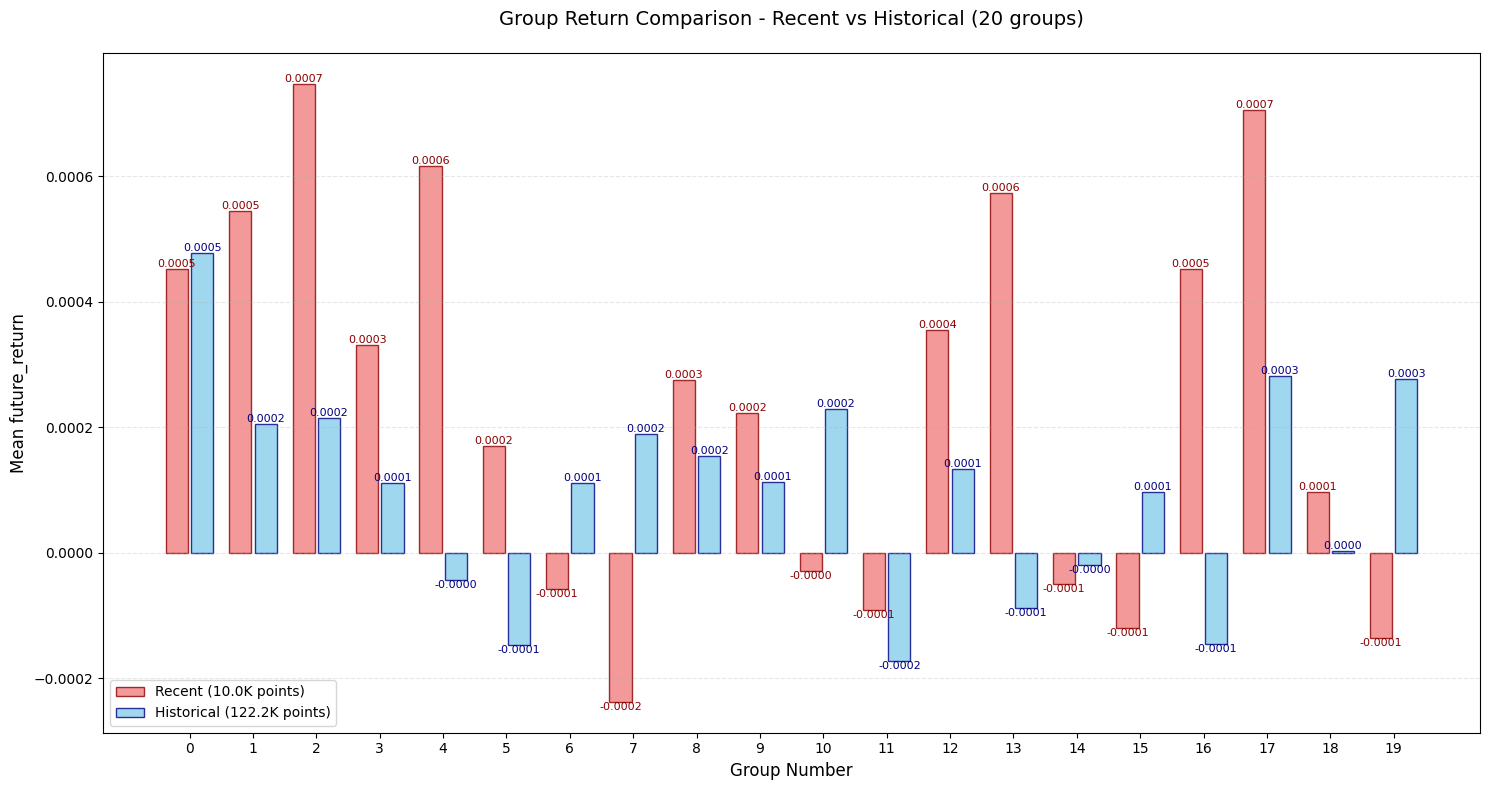

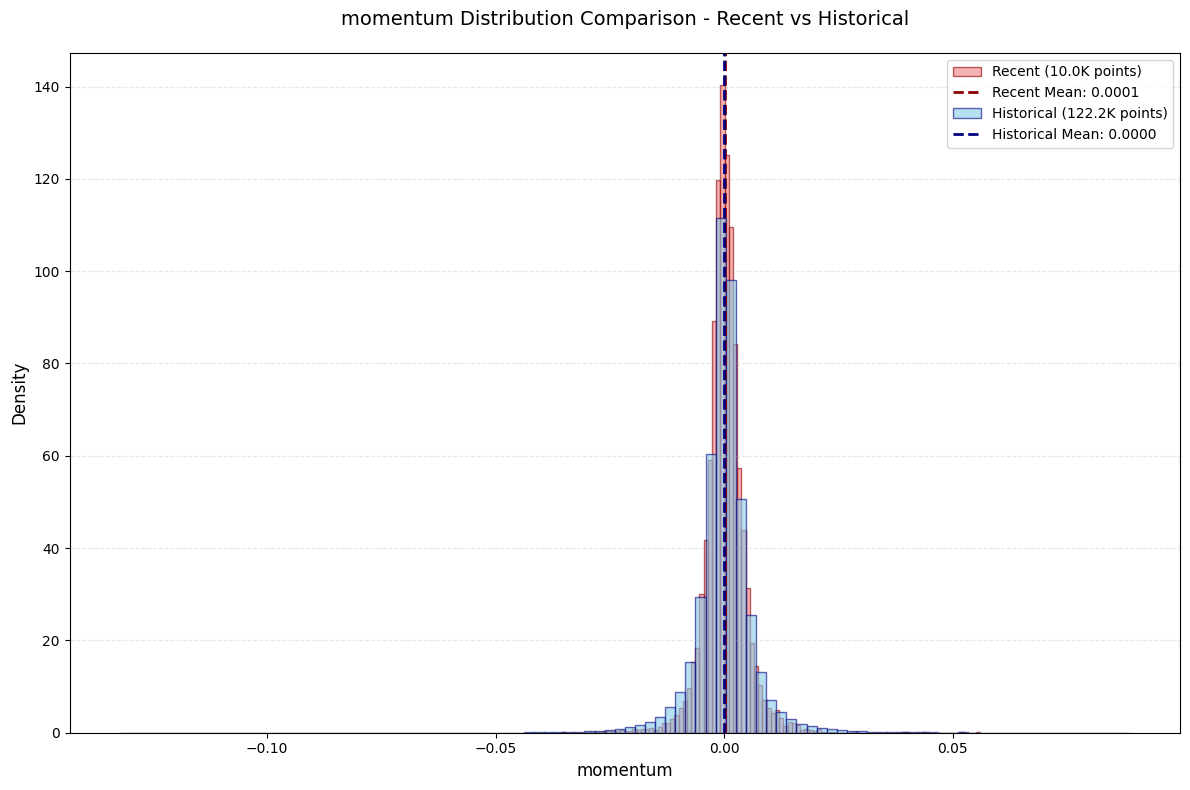

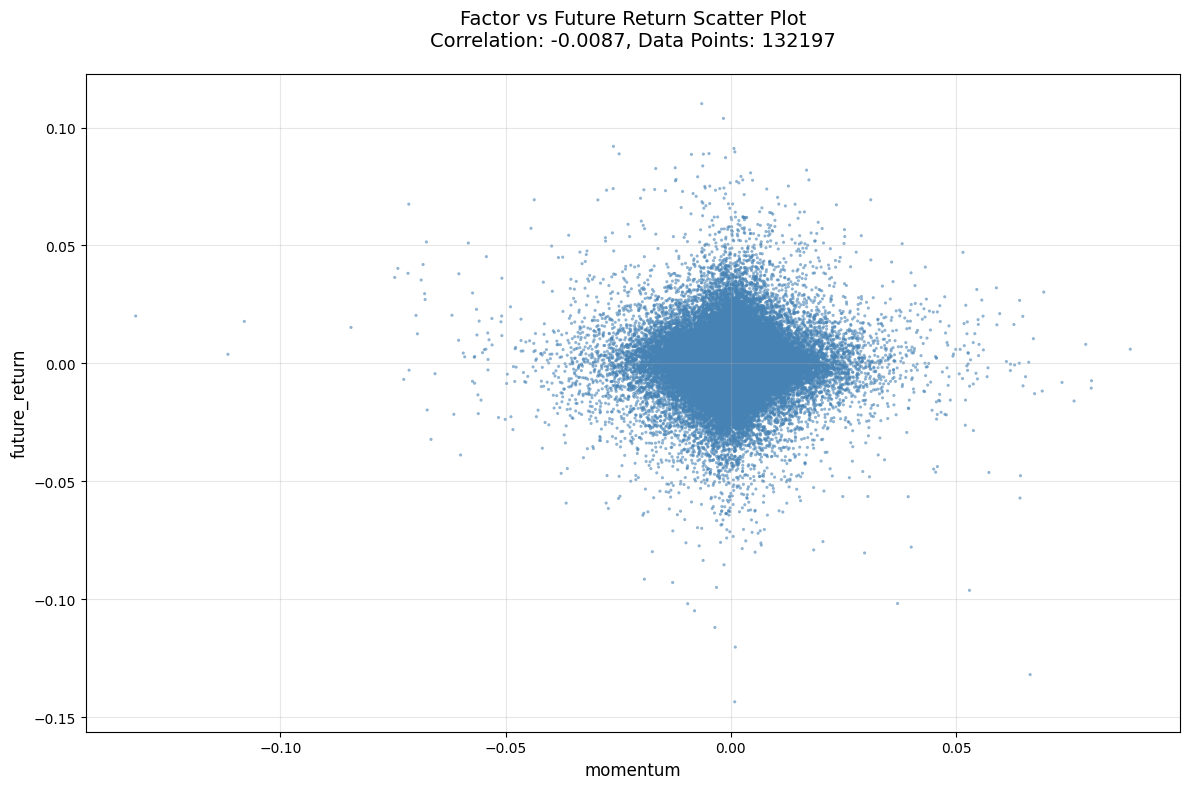

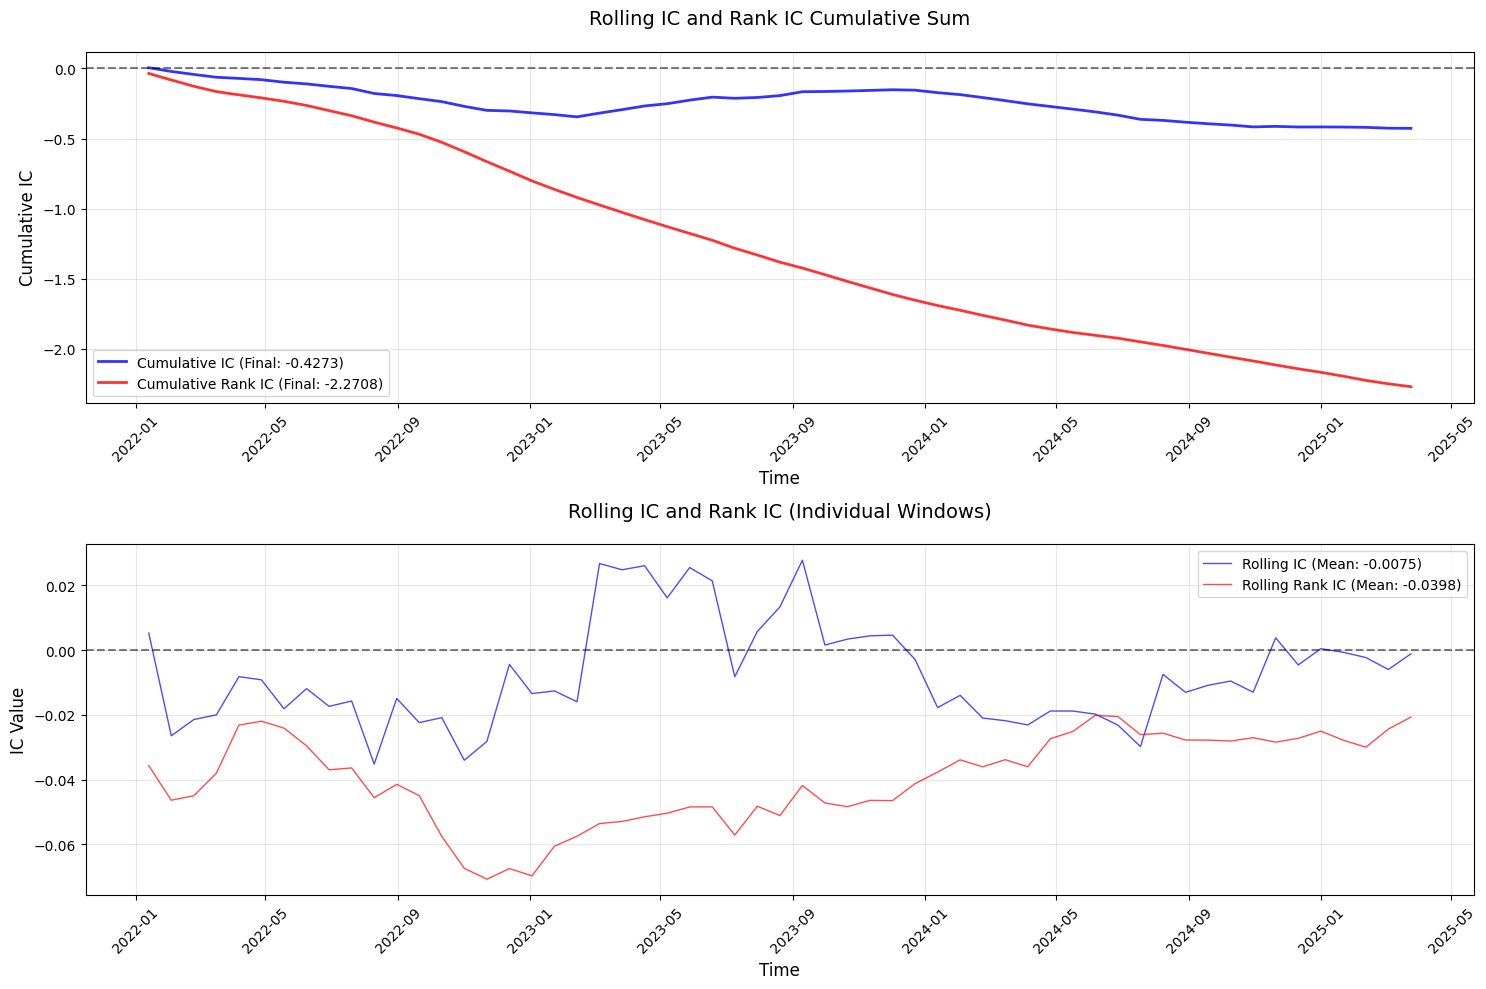

✅ 已显示 4 个图片
----------------------------------------


In [8]:
result = evaluator.run_full_evaluation(n_groups_analysis = 20, run_stationarity_test = False)